In this notebook, we analyse the Seattle AirBnB dataset. 
The data is available at: https://www.kaggle.com/airbnb/seattle

The motivation of the analysis is to understand the various factors that determine the price of any listing, understand how the prices in the listings vary through the year and the neighborhoods in Seattle. 

We will follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology, which consists of the following steps:   

    1. Business Understanding
    2. Data Understanding 
    3. Prepare Data
    4. Data Modeling 
    5. Evaluation

## Section 1. Business Understanding

We would like to understand a few insights from the data:  
 
    1. Are there price variations within the year? Which months are most expensive and which are not?  
    
    2. How are the prices of properties distributed across the neighborhoods?
    
    3. Which are the important factors for determining the price of a property? Can we model this?   

## Section 2. Data Understanding

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

%matplotlib inline

In [2]:
pd.options.display.max_columns = 500

### Load Data

In [3]:
dfListings = pd.read_csv('./listings.csv')

In [4]:
dfListings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [5]:
ListingsColumns = ['id','host_id','host_since','host_response_time','host_response_rate', \
                   'host_acceptance_rate','host_is_superhost', 'host_identity_verified', \
                   'neighbourhood_group_cleansed', 'property_type','room_type','accommodates','bathrooms',\
                   'bedrooms','guests_included','minimum_nights','review_scores_rating','reviews_per_month']

In [6]:
dfListings = dfListings[ListingsColumns]

In [7]:
dfListings.shape

(3818, 18)

In [8]:
dfCalender = pd.read_csv('./calendar.csv')

In [9]:
dfCalender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## Section 3. Data Preparation

#### a. Number of hosts and number of listings

In [10]:
no_hosts = dfListings['host_id'].nunique()
no_listings = dfListings.shape[0]

print("Number of hosts = {} & number of listings in Seattle = {}".format(no_hosts,no_listings))

Number of hosts = 2751 & number of listings in Seattle = 3818


In [11]:
dfCalender['date'] = pd.to_datetime(dfCalender['date'])

In [12]:
mindate = dfCalender['date'].min()
maxdate = dfCalender['date'].max()
print("Data Duration: {} to {}".format(mindate,maxdate))

Data Duration: 2016-01-04 00:00:00 to 2017-01-02 00:00:00


### b. Duplicate Data

In [13]:
duplicatedListings = dfListings.duplicated().sum()

print("Duplicated Listings Rows = {}".format(duplicatedListings))

Duplicated Listings Rows = 0


In [14]:
duplicatedCalender = dfCalender.duplicated().sum()

print("Duplicated Calender Dataset Rows = {}".format(duplicatedCalender))

Duplicated Calender Dataset Rows = 0


### c. Missing Data

In [15]:
dfListings.isna().mean().sort_values(ascending=False)

host_acceptance_rate            0.202462
review_scores_rating            0.169460
reviews_per_month               0.164222
host_response_time              0.136983
host_response_rate              0.136983
bathrooms                       0.004191
bedrooms                        0.001572
host_since                      0.000524
host_identity_verified          0.000524
host_is_superhost               0.000524
property_type                   0.000262
host_id                         0.000000
neighbourhood_group_cleansed    0.000000
room_type                       0.000000
accommodates                    0.000000
guests_included                 0.000000
minimum_nights                  0.000000
id                              0.000000
dtype: float64

In [16]:
dfCalender.isna().mean().sort_values(ascending=False)

price         0.32939
available     0.00000
date          0.00000
listing_id    0.00000
dtype: float64

### d. Feature Preprocessing 

##### i. Drop calender data without price values
Since price is the target variable which we will be predicting later,we will require data with price values given.

In [17]:
dfCalender.dropna(inplace=True)

In [18]:
dfCalender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
9,241032,2016-01-13,t,$85.00
10,241032,2016-01-14,t,$85.00
14,241032,2016-01-18,t,$85.00


##### ii. Change "price" to float, and "available" to boolean in Calender data

In [19]:
dfCalender.price = dfCalender.price.str.replace('$','')

In [20]:
dfCalender.price = dfCalender.price.str.replace(',','').astype('float')

In [21]:
dfCalender['available'].replace({'t':1,'f':0},inplace=True)

In [22]:
dfCalender.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
9,241032,2016-01-13,1,85.0
10,241032,2016-01-14,1,85.0
14,241032,2016-01-18,1,85.0


##### iii. Listings Data : Change "host_response_rate", "host_acceptance_rate" to float, and "host_is_superhost" ," host_identity_verified"	 to boolean)

In [23]:
dfListings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96%,100%,f,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,953595,5177328,2013-02-21,within an hour,98%,100%,t,t,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,96.0,1.48
2,3308979,16708587,2014-06-12,within a few hours,67%,100%,f,t,Queen Anne,House,Entire home/apt,11,4.5,5.0,10,4,97.0,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,NaN,f,t,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,1,1,NaN,NaN
4,278830,1452570,2011-11-29,within an hour,100%,NaN,f,t,Queen Anne,House,Entire home/apt,6,2.0,3.0,6,1,92.0,0.89


In [24]:
dfListings['host_acceptance_rate'] = dfListings['host_acceptance_rate'].str.replace('%','').astype('float')

In [25]:
dfListings['host_response_rate'] = dfListings['host_response_rate'].str.replace('%','').astype('float')

In [26]:
dfListings['host_is_superhost'].replace({'f':0,'t':1},inplace=True)

In [27]:
dfListings['host_identity_verified'].replace({'f':0,'t':1},inplace=True)

In [28]:
dfListings.head()

,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07
1,953595,5177328,2013-02-21,within an hour,98.0,100.0,1.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1,2,96.0,1.48
2,3308979,16708587,2014-06-12,within a few hours,67.0,100.0,0.0,1.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,10,4,97.0,1.15
3,7421966,9851441,2013-11-06,NaN,NaN,NaN,0.0,1.0,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,1,1,NaN,NaN
4,278830,1452570,2011-11-29,within an hour,100.0,NaN,0.0,1.0,Queen Anne,House,Entire home/apt,6,2.0,3.0,6,1,92.0,0.89


### e. Correlation of Price with various features

##### i. Combine the dataframes to capture price in conjunction with other variations

In [29]:
dfListings.rename(columns={'id':'listing_id'},inplace=True)

In [30]:
dfCombined = pd.merge(dfListings,dfCalender)

In [31]:
dfCombined.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,date,available,price
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-04,1,85.0
1,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-05,1,85.0
2,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-13,1,85.0
3,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-14,1,85.0
4,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-18,1,85.0


##### ii. Extract month and year from date and drop date column

In [32]:
dfCombined['month'] = dfCombined['date'].dt.month

In [33]:
dfCombined['year'] = dfCombined['date'].dt.year

In [34]:
dfCombined.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,date,available,price,month,year
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-04,1,85.0,1,2016
1,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-05,1,85.0,1,2016
2,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-13,1,85.0,1,2016
3,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-14,1,85.0,1,2016
4,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,2016-01-18,1,85.0,1,2016


In [35]:
dfCombined.drop(['date'],axis=1,inplace=True)

##### iii. Convert host_since to datetime object

In [36]:
dfCombined['host_since'] = pd.to_datetime(dfCombined['host_since'],errors='coerce')

In [37]:
dfCombined.head()

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,available,price,month,year
0,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
1,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
2,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
3,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016
4,241032,956883,2011-08-11,within a few hours,96.0,100.0,0.0,1.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016


In [38]:
### Combining all of the above in a function
def clean_data(dfcalender,dflistings):
    '''
    Clean up dfcalender and dflistings data and combine them into a single dataframe. 
    
    Parameters
    ----------
    dfcalender (dataframe): The dataframe containing price data per day of each listing.
    dflistings (dataframe): The dataframe containing each listing's details and various details about the host.

    Returns 
    -------
    dfcombined (dataframe): The cleaned up and combined dataframe used for modeling in the later steps. 
    '''

    #remove duplicate entries
    dfcalender.drop_duplicates(inplace=True)
    dflistings.drop_duplicates(inplace=True)
    
    #remove dfcalender values with missing price column
    dfcalender.dropna(inplace=True)
    
    # change "price" to float, and "available" to boolean in Calender data
    dfcalender.price = dfcalender.price.str.replace('$','')
    dfcalender.price = dfcalender.price.str.replace(',','').astype('float')
    dfcalender['available'].replace({'t':1,'f':0},inplace=True)
    
    #Listings Data : Change "host_response_rate", "host_acceptance_rate" to float,
    # and "host_is_superhost" ," host_identity_verified" to boolean)
    dflistings['host_acceptance_rate'] = dflistings['host_acceptance_rate'].str.replace('%','').astype('float')
    dflistings['host_response_rate'] = dflistings['host_response_rate'].str.replace('%','').astype('float')
    
    dflistings['host_is_superhost'].replace({'f':0,'t':1},inplace=True)
    dflistings['host_identity_verified'].replace({'f':0,'t':1},inplace=True)
    
    #combine the dataframes
    dflistings.rename(columns={'id':'listing_id'},inplace=True)
    dfcalender['date'] = pd.to_datetime(dfcalender['date'])
    dfcombined = pd.merge(dflistings,dfcalender)
    

    dfcombined['month'] = dfcombined['date'].dt.month
    dfcombined['year'] = dfcombined['date'].dt.year
    dfcombined.drop(['date'],axis=1,inplace=True)
    
    # convert host_since to datetime object
    dfcombined['host_since'] = pd.to_datetime(dfcombined['host_since'],errors='coerce')
    
    return dfcombined

Now lets test this function by comparing its output with our preprocessed dataframes.

In [39]:
dflistings = pd.read_csv('./listings.csv')
dfcalender = pd.read_csv('./calendar.csv')

In [40]:
ListingsColumns = ['id','host_id','host_since','host_response_time','host_response_rate', \
                   'host_acceptance_rate','host_is_superhost', 'host_identity_verified', \
                   'neighbourhood_group_cleansed', 'property_type','room_type','accommodates','bathrooms',\
                   'bedrooms','guests_included','minimum_nights','review_scores_rating','reviews_per_month']

In [41]:
dflistings = dflistings[ListingsColumns].copy()

In [42]:
dfCombined2 = clean_data(dfcalender,dflistings)

In [43]:
dfCombined2.equals(dfCombined)

True

* Awesome. Now we can go ahead with answering the questions we had stated in the first section, through some plots and a model.  

In [44]:
corrmat = dfCombined.select_dtypes(include=['number']).drop(['listing_id','host_id','available'],axis=1).corr()

#### 1. Correlation Plot

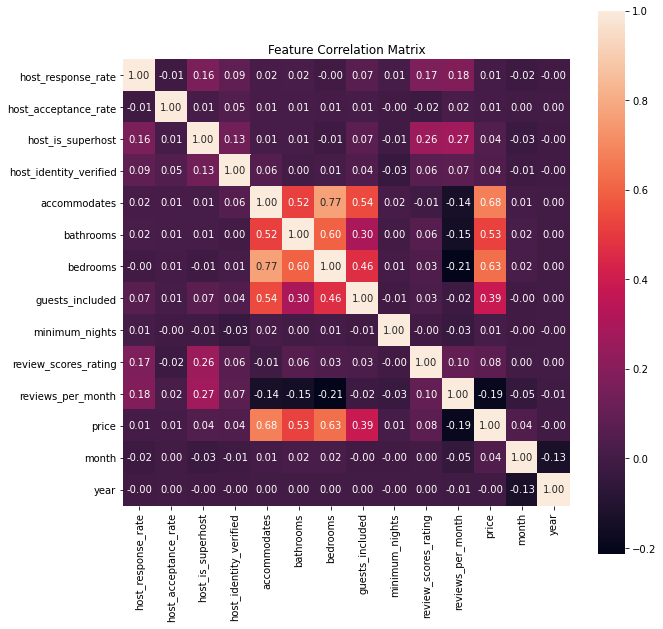

In [45]:
plt.figure(figsize=(10,10))
plt.title('Feature Correlation Matrix');
sns.heatmap(corrmat,
            annot=True,
            square=True,
            fmt = '.2f'
           )

As expected, property parameters related to the size and broader ameneties (number of bedrooms, bathrooms, number of people the property accommodates) determine the price to a large extent and even features like time of the year (month), review_scores, and host related features like host_identity_verified, and host_is_superhost determine the price of the property to some extent.

#### 2. Number of listings by month for 2016

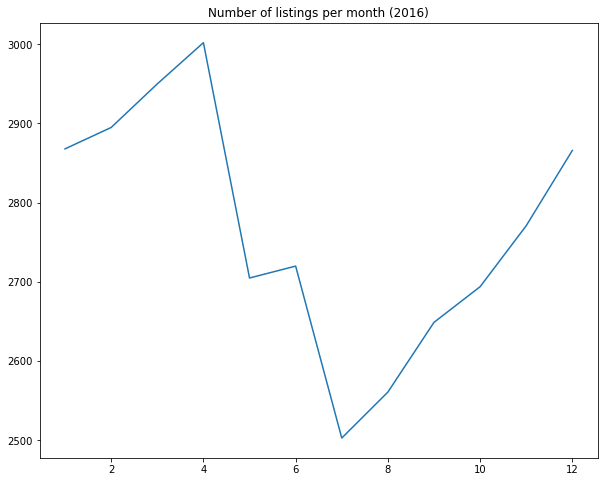

In [46]:
plt.figure(figsize = (10,8))
plt.plot(dfCombined[dfCombined['year'] == 2016].groupby(['month'])['listing_id'].nunique());
plt.title('Number of listings per month (2016)');

* Summer (July) has lower listings than other months 

#### 3. Price Variation by Month

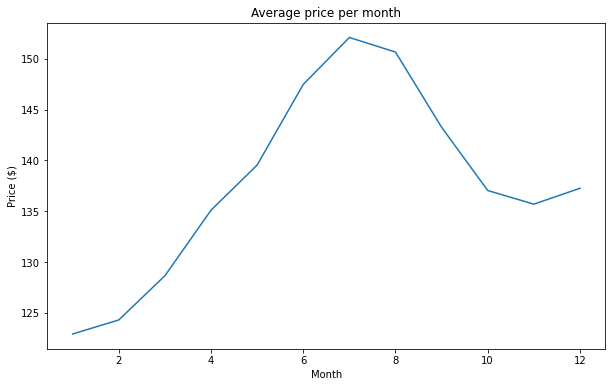

In [47]:
plt.figure(figsize = (10,6))
plt.plot(dfCombined.groupby(['month'])['price'].mean());
plt.title('Average price per month');
plt.xlabel('Month');
plt.ylabel('Price ($)');

#### Question1: Are there price variations within the year? Which months are most expensive and which are not?   

* Summer (July) also has the highest average rates than other parts of the year, and to a lesser extent December as well indicating holiday season to be expensive time to visit Seattle.

#### 4. Prices against neighborhoods

In [48]:
neighborhoods = dfCombined.neighbourhood_group_cleansed.unique()

In [49]:
dfNeighborhood = pd.DataFrame(dfCombined.groupby(['neighbourhood_group_cleansed','month'])['price'].mean().reset_index())

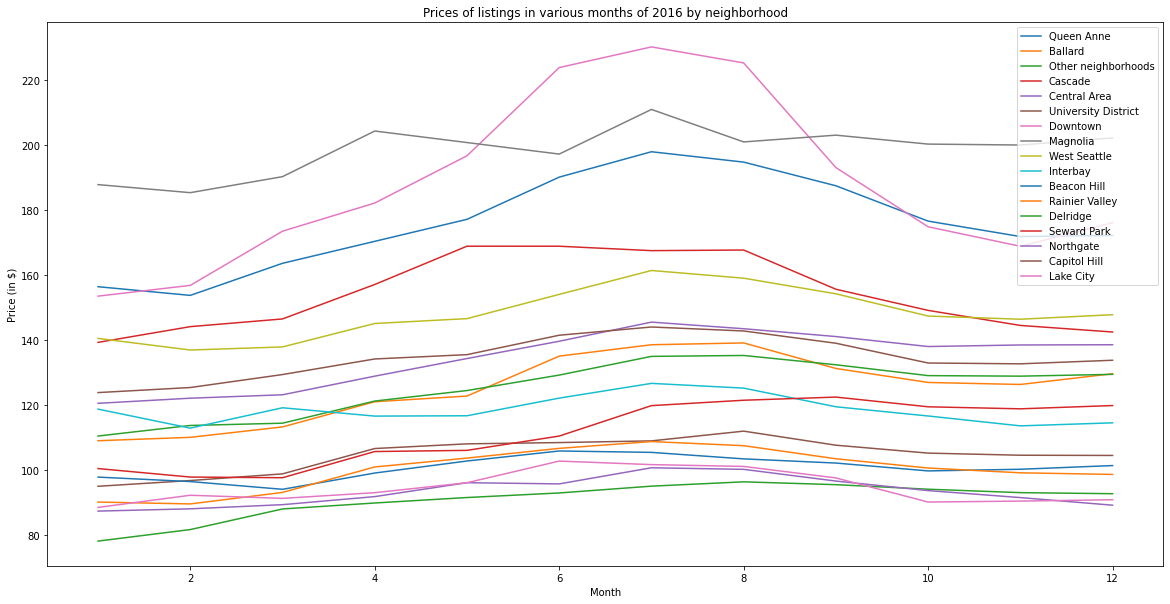

In [50]:
plt.figure(figsize= (20,10))
ax = plt.subplot()
for neighborhood in neighborhoods:
    ax.plot(dfNeighborhood[dfNeighborhood['neighbourhood_group_cleansed'] == neighborhood]['month'],
            dfNeighborhood[dfNeighborhood['neighbourhood_group_cleansed'] == neighborhood]['price'],
            label = neighborhood
           )
ax.legend(loc = 'upper right')
plt.xlabel('Month');
plt.ylabel('Price (in $)');
plt.title('Prices of listings in various months of 2016 by neighborhood');

### Question2 :  How are the prices of properties distributed across the neighborhoods?

* Downtown has the highest prices and almost all neighborhoods have higher prices in summer. 

Now we move to the final part of the analysis: Understanding which features impact prices and building a model to predict prices to answer the last question.

### Question 3: Which are the important factors for determining the price of a property? Can we model this?   

## Section 4. Modeling

We will build the following models:  
    1. Linear Regression Model  
    2. Lasso Regression Model  
    3. Random Forest Regression Model  

* We now make dummy variables of the categorical columns of interest and append them to the combined data.

In [51]:
dfCombinedCat =  pd.get_dummies(dfCombined.select_dtypes(['object'])) 

In [52]:
dfCombinedCat.head()

,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
dfCombined.shape

(934542, 22)

In [54]:
dfCombinedFinal = pd.concat([dfCombined.select_dtypes(['number']),dfCombinedCat],axis=1)

In [55]:
dfCombinedFinal.head()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,guests_included,minimum_nights,review_scores_rating,reviews_per_month,available,price,month,year,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Ballard,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,241032,956883,96.0,100.0,0.0,1.0,4,1.0,1.0,2,1,95.0,4.07,1,85.0,1,2016,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Handling missing data

In [56]:
col_with_missing_data = dfCombinedFinal.isna().mean().sort_values(ascending=False)

In [57]:
col_with_missing_data[col_with_missing_data > 0]

host_acceptance_rate      0.182236
review_scores_rating      0.154661
reviews_per_month         0.149128
host_response_rate        0.116115
bathrooms                 0.005139
bedrooms                  0.002143
host_is_superhost         0.000098
host_identity_verified    0.000098
dtype: float64

#### Strategy: 
-  **host_acceptance_rate, review_scores_rating, reviews_per_month, host_response_rate**: We fill the missing entries for these columns using a statistic (median,mode) since these columns are not very highly correlating to the output.   <br/><br/>

- **bathrooms, bedrooms**: We discard rows with these features missing, as these are highly correlating to the output, thus it would be important to have these details for a prediction.  <br/><br/>

- **host_is_superhost,host_identity_verified**: Since very little data doesnt have this information, we can skip the entries that dont have these inputs. 

In [58]:
dfCombinedFinal['host_acceptance_rate'].mode()[0]

100.0

In [59]:
dfCombinedFinal['host_acceptance_rate'].fillna(dfCombinedFinal['host_acceptance_rate'].mode()[0],inplace=True)

In [60]:
dfCombinedFinal['review_scores_rating'].mode()[0]

100.0

In [61]:
dfCombinedFinal['review_scores_rating'].median()

96.0

In [62]:
dfCombinedFinal['review_scores_rating'].fillna(dfCombinedFinal['review_scores_rating'].median(),inplace=True)

In [63]:
dfCombinedFinal['reviews_per_month'].median()

1.55

In [64]:
dfCombinedFinal['reviews_per_month'].mode()

0    1.0
dtype: float64

In [65]:
dfCombinedFinal['reviews_per_month'].fillna(dfCombinedFinal['reviews_per_month'].mode()[0],inplace=True)

In [66]:
dfCombinedFinal['host_response_rate'].median()

100.0

In [67]:
dfCombinedFinal['host_response_rate'].mode()

0    100.0
dtype: float64

In [68]:
dfCombinedFinal['host_response_rate'].fillna(dfCombinedFinal['reviews_per_month'].median(),inplace=True)

In [69]:
col_with_missing_data = dfCombinedFinal.isna().mean().sort_values(ascending=False)
col_with_missing_data[col_with_missing_data > 0]

bathrooms                 0.005139
bedrooms                  0.002143
host_is_superhost         0.000098
host_identity_verified    0.000098
dtype: float64

* We drop the remaining rows with NA values 

In [70]:
dfCombinedFinal.dropna(axis=0,inplace=True)

In [71]:
dfCombinedFinal.shape

(927644, 57)

We make a function for this now and test the output with the dfCombinedFinal dataframe output

In [72]:
def handle_missing_data(df):
    '''
    Handles missing values in each column depending on the strategy stated above and returns
    clean dataframe with no missing values. 
    
    Parameters
    --------------
    df : Input dataframe with missing values in certain columns 
    
    Returns
    --------------
    df : Output dataframe with either missing values imputed or dropped. 
    
    '''
    df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mode()[0],inplace=True)
    df['review_scores_rating'].fillna(df['review_scores_rating'].median(),inplace=True)
    df['reviews_per_month'].fillna(df['reviews_per_month'].mode()[0],inplace=True)
    df['host_response_rate'].fillna(df['reviews_per_month'].median(),inplace=True)
    
    col_with_missing_data = df.isna().mean().sort_values(ascending=False)
    col_with_missing_data[col_with_missing_data > 0]
    
    df.dropna(axis=0,inplace=True)
    
    return df

In [73]:
df2 = pd.concat([dfCombined.select_dtypes(['number']),dfCombinedCat],axis=1)
dfCombinedFinal2 = handle_missing_data(df2)

In [74]:
dfCombinedFinal2.equals(dfCombinedFinal)

True

* Awesome. Now that our data cleaning function is also set, we move towards splitting the data into features and output column to feed to the machine learning models.

* We finally have 54 features in our training data which we will use to build the models

In [75]:
X = dfCombinedFinal.drop(['listing_id','host_id','price'],axis=1)

In [76]:
y = dfCombinedFinal['price']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [79]:
scaler = MinMaxScaler()

In [80]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
LinRegModel = LinearRegression()

In [82]:
LinRegModel.fit(X_train_scaled,y_train)

LinearRegression()

In [83]:
print("Linear Regression Model: Train Score = {:.2f}".format(LinRegModel.score(X_train_scaled,y_train)))

Linear Regression Model: Train Score = 0.62


In [84]:
print("Linear Regression Model: Test Score = {:.2f}".format(LinRegModel.score(X_test_scaled,y_test)))

Linear Regression Model: Test Score = 0.62


In [85]:
LinRegModel.coef_

array([-8.96614065e+00, -3.96192008e+01,  1.58009800e+01,  2.32352486e+00,
        2.01237343e+02,  2.73717707e+02,  2.26822061e+02,  3.43087541e+01,
       -1.31579547e+01,  7.49306590e+01, -5.96129688e+01, -1.11018826e+12,
        8.47282060e+00,  6.04887510e-02, -1.11643881e+01, -1.35938661e+01,
       -9.84649647e+00, -1.01831010e+01,  1.54080535e+13,  1.54080535e+13,
        1.54080535e+13,  1.54080535e+13,  1.54080535e+13,  1.54080535e+13,
        1.54080535e+13,  1.54080535e+13,  1.54080535e+13,  1.54080535e+13,
        1.54080535e+13,  1.54080535e+13,  1.54080535e+13,  1.54080535e+13,
        1.54080535e+13,  1.54080535e+13,  1.54080535e+13,  3.00740205e+01,
        4.26131347e+01,  1.60484626e+02,  3.79214134e+01,  4.41546607e+01,
        7.73967503e+01,  2.66981347e+01,  3.44291678e+01, -1.05195769e+02,
        3.31450154e+01,  5.15154022e+01,  2.91182185e+01, -7.96899338e+00,
        2.32426730e+01,  3.29218508e+01,  4.87701539e+01,  1.88099110e+13,
        1.88099110e+13,  

In [86]:
dfLinCoefs = pd.DataFrame({'columns':X_train.columns,
              'Coefficient':LinRegModel.coef_})

In [87]:
dfLinCoefs.sort_values(by='Coefficient',ascending=False).reset_index().drop(['index'],axis=1)[:15]

,columns,Coefficient
0,room_type_Entire home/apt,1.880991e+13
1,room_type_Private room,1.880991e+13
2,room_type_Shared room,1.880991e+13
3,neighbourhood_group_cleansed_Downtown,1.540805e+13
4,neighbourhood_group_cleansed_Queen Anne,1.540805e+13
5,neighbourhood_group_cleansed_Magnolia,1.540805e+13
6,neighbourhood_group_cleansed_Cascade,1.540805e+13
7,neighbourhood_group_cleansed_Capitol Hill,1.540805e+13
8,neighbourhood_group_cleansed_Interbay,1.540805e+13
9,neighbourhood_group_cleansed_West Seattle,1.540805e+13


* Unfortunately the coefficient weights dont seem to be matching to expected important variables. Since Linear model is unable to deduct any features away and also cannot capture correlations between features thus the coefficients will be a bit unexplainable. 

* We now move to a slightly better linear regression model. 

* Model 2: Lasso Regressor

In [88]:
LassoModel = Lasso(alpha=0.1)

In [89]:
LassoModel.fit(X_train_scaled,y_train)

Lasso(alpha=0.1)

In [90]:
print("Lasso Regression Model: Train Score = {:.2f}".format(LassoModel.score(X_train_scaled,y_train)))

Lasso Regression Model: Train Score = 0.61


In [91]:
print("Lasso Regression Model: Test Score = {:.2f}".format(LassoModel.score(X_test_scaled,y_test)))

Lasso Regression Model: Test Score = 0.61


In [92]:
LassoModel.coef_

array([-17.5441838 ,  -0.        ,  15.81079732,   1.38838946,
       198.62256424, 261.13614155, 229.72907183,  22.59185413,
        -0.        ,  57.57114503, -54.19144118,   0.        ,
         7.45221966,  -0.        ,  -0.        ,  -3.81748668,
        -0.        ,  -0.        ,  -1.05462122,  -4.05930033,
        24.42156846,  27.00783778,  -0.43670788, -13.64346172,
        58.23510598,   0.        ,  -6.69593238,  30.12107133,
       -21.71874312,   1.40964568,  34.34621373, -10.71364963,
        -9.49995486,   0.        ,   3.96345362,  -4.78676907,
         0.        ,  90.76615826,   0.        ,   0.        ,
        13.17385043,  -0.        ,   0.        ,  -0.        ,
        -1.96499468,   7.36284185,  -0.        ,  -0.        ,
        -7.71466999,  -0.        ,   0.        ,  37.61851308,
        -0.        , -32.5380585 ])

In [93]:
dfLassoCoefs = pd.DataFrame({'columns':X_train.columns,
              'Coefficient':LassoModel.coef_})

In [94]:
dfLassoCoefs.sort_values(by='Coefficient',ascending=False).reset_index().drop(['index'],axis=1)[:15]

,columns,Coefficient
0,bathrooms,261.136142
1,bedrooms,229.729072
2,accommodates,198.622564
3,property_type_Boat,90.766158
4,neighbourhood_group_cleansed_Downtown,58.235106
5,review_scores_rating,57.571145
6,room_type_Entire home/apt,37.618513
7,neighbourhood_group_cleansed_Queen Anne,34.346214
8,neighbourhood_group_cleansed_Magnolia,30.121071
9,neighbourhood_group_cleansed_Cascade,27.007838


We already see sensible features with higher weights so even though the scores of linear and lasso regression were not too different, Lasso regression is the model to go forward with between the two, since it is able to capture important features. 

We now move towards the final model: Random Forest Regressor, since it has the capacity to model complicated relationships between the features and the target variable. 

* Model 3: RF Regressor

In [95]:
RFModel = RandomForestRegressor(n_estimators=100,
                                random_state= 42,
                                n_jobs=-1
                               )

In [96]:
RFModel.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [97]:
print("RFModel Model: Train Score = {:.2f}".format(RFModel.score(X_train,y_train)))

RFModel Model: Train Score = 0.98


In [98]:
print("RFModel Model: Test Score = {:.2f}".format(RFModel.score(X_test,y_test)))

RFModel Model: Test Score = 0.98


We now look at residual plots and prediction vs actual plots for each of the models. 

## Section 5. Validation

* Performance

In [99]:
y_pred_linreg = LinRegModel.predict(X_test_scaled)

In [100]:
y_pred_lasso = LassoModel.predict(X_test_scaled)

In [101]:
y_pred_RF = RFModel.predict(X_test)

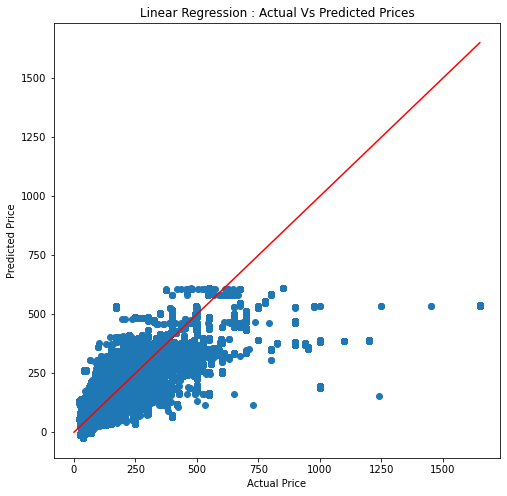

In [102]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y_pred_linreg,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Linear Regression : Actual Vs Predicted Prices');

* Linear Regression Model seems to underpredict larger prices (> 700).

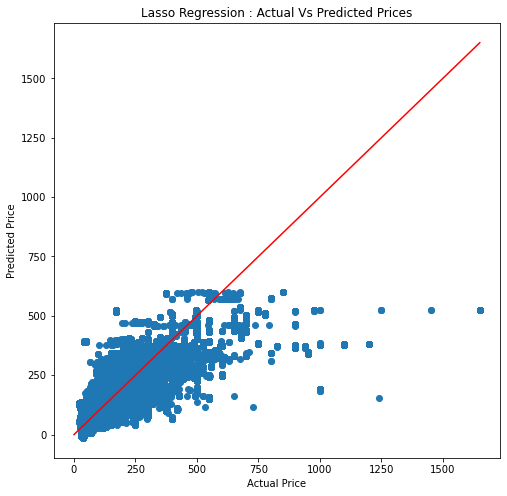

In [103]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y_pred_lasso,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Lasso Regression : Actual Vs Predicted Prices');

* Same is the case with Lasso model, where higher price properties are underpredicted. 

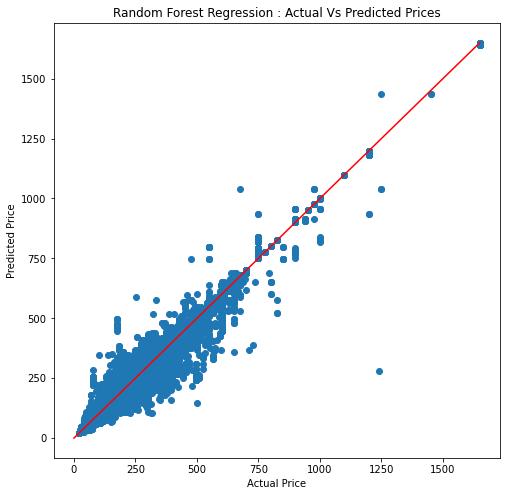

In [104]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y_pred_RF,marker='o');
x = np.linspace(0,max(y_test));
plt.plot(x,x,color = 'r');
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Random Forest Regression : Actual Vs Predicted Prices');

* Random forest model seems to be capturing all price listings well in its predictions.

#### Residuals Plot

We now look at error plots for each of the 3 models:

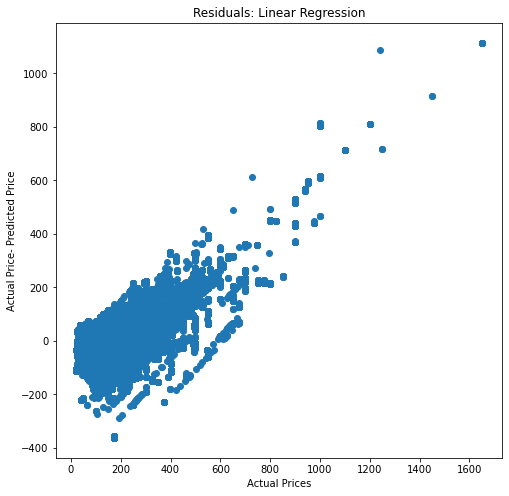

In [105]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,(y_test - y_pred_linreg));
plt.title('Residuals: Linear Regression');
plt.xlabel('Actual Prices');
plt.ylabel('Actual Price- Predicted Price');

The residual errors do have a pattern since higher actual price listings have higher errors as seen in the prediction plot above. Thus this model is not a good predictor for higher price listings.

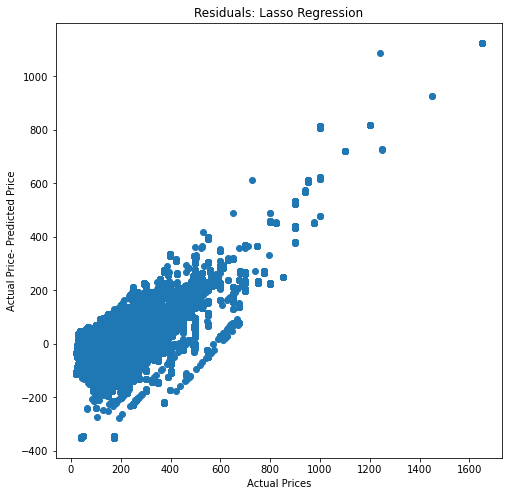

In [106]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,(y_test - y_pred_lasso));
plt.title('Residuals: Lasso Regression');
plt.xlabel('Actual Prices');
plt.ylabel('Actual Price- Predicted Price');

Similar to Linear Regression Residual plot, Lasso Regression residuals also increase linearly with higher actual prices, indicating the model's poor performance in that range of listings.

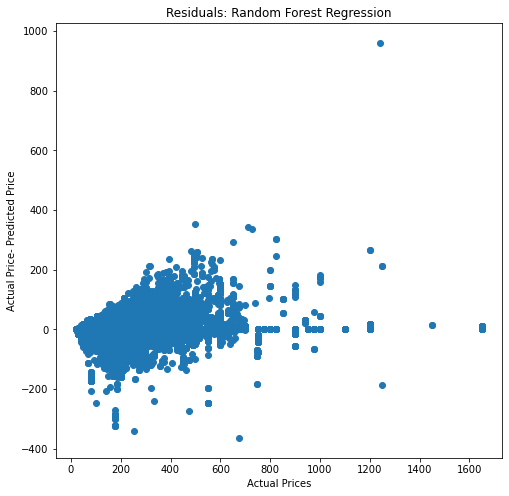

In [107]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,(y_test - y_pred_RF));
plt.title('Residuals: Random Forest Regression');
plt.xlabel('Actual Prices');
plt.ylabel('Actual Price- Predicted Price');

* Residuals plot here looks good with values having no pattern, as is required for a good residuals plot. 

We finally look at the important features found by Random Forest Regressor Model. 

In [108]:
dfFeatureImportance = pd.DataFrame({
        'Features' : X_train.columns,
    'FeatureImportance' : RFModel.feature_importances_
}
)

In [109]:
dfFeatureImportance['FeatureImportance'] = dfFeatureImportance['FeatureImportance'] * 100

In [110]:
dfFeatureImportance.sort_values(by=['FeatureImportance'],ascending=False).reset_index().drop(['index'],axis=1)[:15]

,Features,FeatureImportance
0,bedrooms,38.620767
1,bathrooms,16.119996
2,reviews_per_month,7.196362
3,accommodates,4.928941
4,room_type_Entire home/apt,4.567650
5,month,4.238756
6,review_scores_rating,3.040524
7,neighbourhood_group_cleansed_Downtown,2.587370
8,minimum_nights,2.539933
9,guests_included,2.333865


Features that we expected to be related to price determination are also deemed important by the Random Forest Regressor model. 

#### Summary: 

In this notebook we looked at Seattle AirBnB data. 

We investigated a few questions through the available data:   
    
    1. How are the prices of properties distributed across the neighborhoods?
    
    2. Are there price variations within the year? Which months are most expensive and which are not?  
    
    3. Which are the important factors for determining the price of a property? Can we model this?   

We did basic data wrangling to get the features we require from the data for the model.
We then built a few models to estimate price for a listing given the features. Random Forest model did quite a good job in estimating the prices. 

Hope this gave some flavor in analysing the data through a CRISP-DM methodology. 
Cheers!
 
    